### Analisis de asociaciones (market basket analysis)

In [37]:
my_basket=[['bread','butter','wine','bananas','coffee','carrots'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['beer','chips','asparagus','salsa','milk','apples'],
           ['olive oil','bread','butter','tomatoes','steak','carrots'],
           ['tomatoes','onions','chips','wine','ketchup','orange juice'],
           ['bread','butter','beer','chips','milk'],
           ['butter','tomatoes','carrots','coffee','sugar'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['bread','butter','ketchup','coffee','chicken wings'],
           ['butter','beer','chips','asparagus','apples'],
           ['tomatoes','onion','beer','chips','milk','coffee']]

In [38]:
def get_metrics(x,y):
    fx_ = sum(x in i for i in my_basket)
    fy_ = sum(y in i for i in my_basket)
    fxy_ = sum([all(z in i for z in [x,y]) for i in my_basket])
    # Metricas
    support = fxy_/len(my_basket)
    confidence = support/(fx_/len(my_basket))
    lift = confidence/(fy_/len(my_basket))
    return support,confidence,lift

In [39]:
get_metrics('bread','butter')

(0.36363636363636365, 1.0, 1.8333333333333335)

In [40]:
import numpy as np
import pandas as pd

In [41]:
groceries = pd.read_csv('groceries.csv', sep=';')
groceries.head()

,ID,Transaction
0,0,"milk,bread,biscuit"
1,1,"bread,milk,biscuit,cereal"
2,2,"bread,tea"
3,3,"jam,bread,milk"
4,4,"tea,biscuit"


In [42]:
# Separar productos individuales
transactions = list(groceries['Transaction'].apply(lambda x: sorted(x.split(','))))
transactions

[['biscuit', 'bread', 'milk'],
 ['biscuit', 'bread', 'cereal', 'milk'],
 ['bread', 'tea'],
 ['bread', 'jam', 'milk'],
 ['biscuit', 'tea'],
 ['bread', 'tea'],
 ['cereal', 'tea'],
 ['biscuit', 'bread', 'tea'],
 ['bread', 'jam', 'tea'],
 ['bread', 'milk'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['coffee', 'sugar'],
 ['bread', 'coffee', 'orange'],
 ['biscuit', 'bread', 'sugar'],
 ['cereal', 'coffee', 'sugar'],
 ['biscuit', 'bread', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['cereal', 'coffee', 'milk', 'tea']]

In [43]:
# Tabla binaria
from mlxtend.preprocessing import TransactionEncoder
enc = TransactionEncoder().fit(transactions)
onehot = enc.transform(transactions)
onehot

array([[ True,  True, False, False, False,  True, False, False, False],
       [ True,  True,  True, False, False,  True, False, False, False],
       [False,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True,  True, False, False, False],
       [ True, False, False, False, False, False, False, False,  True],
       [False,  True, False, False, False, False, False, False,  True],
       [False, False,  True, False, False, False, False, False,  True],
       [ True,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False, False,  True],
       [False,  True, False, False, False,  True, False, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [False, False, False,  True, False, False, False,  True, False],
       [False,  True, False,  True, False, False,  True, False, 

In [44]:
onehot = pd.DataFrame(onehot, columns=enc.columns_)
onehot.head()

,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
0,True,True,False,False,False,True,False,False,False
1,True,True,True,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True
3,False,True,False,False,True,True,False,False,False
4,True,False,False,False,False,False,False,False,True


In [45]:
# Obtener los conjuntos de productos ferecuentes
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(onehot, min_support=0.01, use_colnames=True, max_len=3)
frequent_itemsets.head(10)

,support,itemsets
0,0.40,(biscuit)
1,0.65,(bread)
2,0.30,(cereal)
3,0.40,(coffee)
4,0.10,(jam)
5,0.25,(milk)
6,0.15,(orange)
7,0.30,(sugar)
8,0.35,(tea)
9,0.25,"(biscuit, bread)"


In [46]:
frequent_itemsets.tail(5)

,support,itemsets
49,0.10,"(cereal, coffee, orange)"
50,0.05,"(cereal, sugar, coffee)"
51,0.05,"(cereal, tea, coffee)"
52,0.05,"(cereal, tea, milk)"
53,0.05,"(coffee, tea, milk)"


In [47]:
# Reglas de asociación
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,0.0300,1.200000,0.285714
1,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,0.0300,1.120000,0.333333
2,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,0.0000,1.000000,0.000000
3,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,0.0000,1.000000,0.000000
4,(biscuit),(orange),0.40,0.15,0.10,0.250000,1.666667,0.0400,1.133333,0.666667
...,...,...,...,...,...,...,...,...,...,...
111,"(coffee, milk)",(tea),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf,0.684211
112,"(tea, milk)",(coffee),0.05,0.40,0.05,1.000000,2.500000,0.0300,inf,0.631579
113,(coffee),"(tea, milk)",0.40,0.05,0.05,0.125000,2.500000,0.0300,1.085714,1.000000
114,(tea),"(coffee, milk)",0.35,0.05,0.05,0.142857,2.857143,0.0325,1.108333,1.000000


In [48]:
# Reglas que tengan dos elementos en el antecedente (lhs)
rules['lhs_items'] = rules['antecedents'].apply(lambda x: len(x))
rules[rules['lhs_items'] > 1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
58,"(coffee, biscuit)",(orange),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf,0.944444,2
52,"(cereal, biscuit)",(orange),0.15,0.15,0.10,0.666667,4.444444,0.0775,2.55,0.911765,2
64,"(cereal, bread)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
110,"(coffee, tea)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
42,"(coffee, biscuit)",(cereal),0.10,0.30,0.10,1.000000,3.333333,0.0700,inf,0.777778,2


In [49]:
# Convertir a tabla con 'lift' como pivote
# Cambiar 'frozenset' a 'str'
rules['antecedents_'] = rules['antecedents'].apply(lambda x: ','.join(list(x)))
rules['consequents_'] = rules['consequents'].apply(lambda x: ','.join(list(x)))
# Crear tabla pivote
pivot = rules[rules['lhs_items'] > 1].pivot(index='antecedents_', columns='consequents_', values='lift')
pivot

consequents_,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
antecedents_,,,,,,,,,
"biscuit,bread",NaN,NaN,NaN,NaN,NaN,1.600000,NaN,1.333333,NaN
"biscuit,milk",NaN,1.538462,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
"biscuit,orange",NaN,NaN,3.333333,2.500000,NaN,NaN,NaN,NaN,NaN
"bread,orange",NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN
"cereal,biscuit",NaN,NaN,NaN,1.666667,NaN,1.333333,4.444444,NaN,NaN
"cereal,bread",2.500000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN
"cereal,coffee",1.250000,NaN,NaN,NaN,NaN,1.000000,3.333333,NaN,NaN
"cereal,milk",1.250000,NaN,NaN,1.250000,NaN,NaN,NaN,NaN,1.428571
"cereal,orange",2.500000,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN


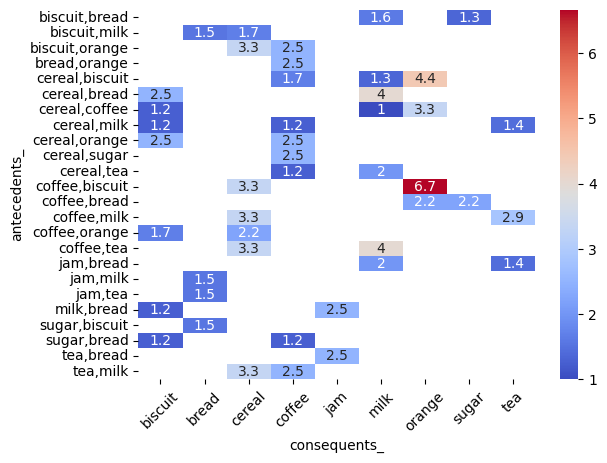

In [50]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()